In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
import datetime
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
from IPython.core.display import HTML, display
from urllib.request import Request, urlopen

In [2]:
candy = gpd.read_file('data/state-by-state-favorite-halloween-candy.geojson')

In [3]:
candy.head()

,name,3rd_place,2nd_place_pounds,state,2nd_place,3rd_place_pounds,top_candy,top_candy_pounds,geometry
0,Florida,Reese's Peanut Butter Cups,543529,FL,Snickers,194117,Skittles,660000,"MULTIPOLYGON (((-82.98339 24.60263, -82.98624 ..."
1,Kansas,Dubble Bubble Gum,210375,KS,Reese's Peanut Butter Cups,111375,M&M's,247500,"POLYGON ((-102.04521 38.69757, -102.04521 38.7..."
2,New York,Reese's Peanut Butter Cups,95047,NY,Candy Corn,39603,Sour Patch Kids,198016,"MULTIPOLYGON (((-74.04657 40.68964, -74.04675 ..."
3,Washington,Hershey Kisses,171211,WA,Tootsie Pops,61147,Salt Water Taffy,207900,"POLYGON ((-123.24903 48.28431, -123.23154 48.3..."
4,California,Skittles,1188000,CA,M&M's,726000,Assorted Salt Water Taffy,1650000,"MULTIPOLYGON (((-119.63472 33.26544, -119.6363..."


In [ ]:
#Create a new column, total_pounds, to show the combined weight of 1st, 2nd, and 3rd place candies 
#consumed by each state.

In [8]:
candy['total_weight'] = candy[['top_candy_pounds', '3rd_place_pounds', '2nd_place_pounds']].sum(1)

In [9]:
candy.head(2)

,name,3rd_place,2nd_place_pounds,state,2nd_place,3rd_place_pounds,top_candy,top_candy_pounds,geometry,total_weight
0,Florida,Reese's Peanut Butter Cups,543529,FL,Snickers,194117,Skittles,660000,"MULTIPOLYGON (((-82.98339 24.60263, -82.98624 ...",1397646
1,Kansas,Dubble Bubble Gum,210375,KS,Reese's Peanut Butter Cups,111375,M&M's,247500,"POLYGON ((-102.04521 38.69757, -102.04521 38.7...",569250


In [5]:
#Which state consumes the most of its 1st, 2nd, and 3rd place candies combined (greatest combined weight)

In [10]:
candy.sort_values(by = 'total_weight', ascending = False)

,name,3rd_place,2nd_place_pounds,state,2nd_place,3rd_place_pounds,top_candy,top_candy_pounds,geometry,total_weight
4,California,Skittles,1188000,CA,M&M's,726000,Assorted Salt Water Taffy,1650000,"MULTIPOLYGON (((-119.63472 33.26544, -119.6363...",3564000
49,Arizona,Hot Tamales Minis,680450,AZ,Hershey Kisses,453633,Snickers,963971,"POLYGON ((-114.51645 33.02762, -114.51664 33.0...",2098054
0,Florida,Reese's Peanut Butter Cups,543529,FL,Snickers,194117,Skittles,660000,"MULTIPOLYGON (((-82.98339 24.60263, -82.98624 ...",1397646
42,Utah,Tootsie Pops,260883,UT,Reese's Peanut Butter Cups,139137,Jolly Ranchers Candy,469590,"POLYGON ((-114.04702 39.90604, -114.04713 39.9...",869610
41,Pennsylvania,Hershey's Mini Chocolate Candy Bars,269497,PA,M&M's,104804,Skittles,299442,"POLYGON ((-80.51935 41.84956, -80.51938 41.850...",673743
11,Nevada,Skittles,184827,NV,Candy Corn,127957,Hershey Kisses,341220,"POLYGON ((-119.32418 41.99385, -119.32362 41.9...",654004
47,Hawaii,Milky Way,255984,HI,Hawaiian Host,105405,Hershey Kisses,271042,"MULTIPOLYGON (((-166.38290 23.82966, -166.3844...",632431
21,Virginia,Candy Corn,232464,VA,Snickers,107291,Hot Tamales,286110,"POLYGON ((-77.04136 38.78542, -77.04136 38.768...",625865
1,Kansas,Dubble Bubble Gum,210375,KS,Reese's Peanut Butter Cups,111375,M&M's,247500,"POLYGON ((-102.04521 38.69757, -102.04521 38.7...",569250
13,Arkansas,Hot Tamales Minis,194631,AR,Butterfinger,51218,Jolly Ranchers Candy,245850,"POLYGON ((-94.55218 36.10224, -94.55219 36.102...",491699


In [ ]:
#california does by alot more than the next state




In [ ]:
#Which state consumes the least of its 1st, 2nd, and 3rd place candies combined (lowest combined weight)?

In [12]:
candy.sort_values(by = 'total_weight', ascending = True)

,name,3rd_place,2nd_place_pounds,state,2nd_place,3rd_place_pounds,top_candy,top_candy_pounds,geometry,total_weight
44,Connecticut,M&M's,1366,CT,Milky Way,910,Almond Joy,2619,"POLYGON ((-73.51808 41.66672, -73.51807 41.666...",4895
7,Alaska,Kit Kat,4012,AK,Blow Pops,3209,Twix,5082,"MULTIPOLYGON (((172.35392 52.89499, 172.34785 ...",12303
29,Colorado,Hershey Kisses,4918,CO,Milky Way,2459,Twix,5532,"POLYGON ((-109.05095 40.22265, -109.05097 40.2...",12909
46,Rhode Island,Twix,11583,RI,M&M's,7078,Candy Corn,16731,"MULTIPOLYGON (((-71.67264 41.13429, -71.67609 ...",35392
12,Oklahoma,Butterfinger,8898,OK,Dubble Bubble Gum,7415,Snickers,19279,"POLYGON ((-100.00376 36.49985, -100.00397 36.4...",35592
39,Delaware,Candy Corn,17061,DE,Skittles,8530,Life Savers,19905,"POLYGON ((-75.76007 39.29682, -75.76010 39.297...",45496
36,Montana,M&M's,14850,MT,Twix,10890,Dubble Bubble Gum,25740,"POLYGON ((-115.62870 47.47964, -115.62939 47.4...",51480
50,South Dakota,Almond Joy,19569,SD,Jolly Ranchers Candy,6179,Starburst,27809,"POLYGON ((-100.49937 45.94365, -100.48192 45.9...",53557
5,District of Columbia,Blow Pops,18276,DC,Tootsie Pops,10153,M&M's,26400,"POLYGON ((-77.11975 38.93435, -77.11886 38.935...",54829
25,Vermont,Skittles,23100,VT,M&M's,12320,Milky Way,32340,"POLYGON ((-73.31328 44.26413, -73.31274 44.265...",67760


In [ ]:
#connecticut consumes the least 

In [ ]:
#What is the average amount of combined candy consumed across all states? What is the median amount?

In [13]:
candy['total_weight'].mean()

373608.8823529412

In [14]:
candy['total_weight'].median()

191589.0

In [ ]:
#name

In [ ]:
#Read in the population data and merge it with the candy data.

In [15]:
pop = pd.read_csv('data/population_est2017.csv')

In [16]:
pop.head(2)

,NAME,POPESTIMATE2017
0,Alabama,4874747
1,Alaska,739795


In [19]:
can_pop = pd.merge(left = pop, right = candy,
                  left_on = 'NAME', right_on = 'name')

In [20]:
can_pop

,NAME,POPESTIMATE2017,name,3rd_place,2nd_place_pounds,state,2nd_place,3rd_place_pounds,top_candy,top_candy_pounds,geometry,total_weight
0,Alabama,4874747,Alabama,Tootsie Pops,40173,AL,Candy Corn,34434,Hershey's Mini Chocolate Candy Bars,66000,"POLYGON ((-88.13999 34.58170, -88.13997 34.581...",140607
1,Alaska,739795,Alaska,Kit Kat,4012,AK,Blow Pops,3209,Twix,5082,"MULTIPOLYGON (((172.35392 52.89499, 172.34785 ...",12303
2,Arizona,7016270,Arizona,Hot Tamales Minis,680450,AZ,Hershey Kisses,453633,Snickers,963971,"POLYGON ((-114.51645 33.02762, -114.51664 33.0...",2098054
3,Arkansas,3004279,Arkansas,Hot Tamales Minis,194631,AR,Butterfinger,51218,Jolly Ranchers Candy,245850,"POLYGON ((-94.55218 36.10224, -94.55219 36.102...",491699
4,California,39536653,California,Skittles,1188000,CA,M&M's,726000,Assorted Salt Water Taffy,1650000,"MULTIPOLYGON (((-119.63472 33.26544, -119.6363...",3564000
5,Colorado,5607154,Colorado,Hershey Kisses,4918,CO,Milky Way,2459,Twix,5532,"POLYGON ((-109.05095 40.22265, -109.05097 40.2...",12909
6,Connecticut,3588184,Connecticut,M&M's,1366,CT,Milky Way,910,Almond Joy,2619,"POLYGON ((-73.51808 41.66672, -73.51807 41.666...",4895
7,Delaware,961939,Delaware,Candy Corn,17061,DE,Skittles,8530,Life Savers,19905,"POLYGON ((-75.76007 39.29682, -75.76010 39.297...",45496
8,District of Columbia,693972,District of Columbia,Blow Pops,18276,DC,Tootsie Pops,10153,M&M's,26400,"POLYGON ((-77.11975 38.93435, -77.11886 38.935...",54829
9,Florida,20984400,Florida,Reese's Peanut Butter Cups,543529,FL,Snickers,194117,Skittles,660000,"MULTIPOLYGON (((-82.98339 24.60263, -82.98624 ...",1397646


In [ ]:
# Calculate a new column, per_capita to show the average weight (total pounds) consumed 
# per person in each state.

In [21]:
can_pop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   NAME              51 non-null     object  
 1   POPESTIMATE2017   51 non-null     int64   
 2   name              51 non-null     object  
 3   3rd_place         51 non-null     object  
 4   2nd_place_pounds  51 non-null     int64   
 5   state             51 non-null     object  
 6   2nd_place         51 non-null     object  
 7   3rd_place_pounds  51 non-null     int64   
 8   top_candy         51 non-null     object  
 9   top_candy_pounds  51 non-null     int64   
 10  geometry          51 non-null     geometry
 11  total_weight      51 non-null     int64   
dtypes: geometry(1), int64(5), object(6)
memory usage: 5.2+ KB


In [29]:
can_pop['per_capita'] = can_pop['total_weight'] / can_pop['POPESTIMATE2017']

In [30]:
can_pop

,NAME,POPESTIMATE2017,name,3rd_place,2nd_place_pounds,state,2nd_place,3rd_place_pounds,top_candy,top_candy_pounds,geometry,total_weight,per_capita,per_capita_top,per_capita_second,per_capita_third
0,Alabama,4874747,Alabama,Tootsie Pops,40173,AL,Candy Corn,34434,Hershey's Mini Chocolate Candy Bars,66000,"POLYGON ((-88.13999 34.58170, -88.13997 34.581...",140607,0.028844,73.859803,121.343863,141.567840
1,Alaska,739795,Alaska,Kit Kat,4012,AK,Blow Pops,3209,Twix,5082,"MULTIPOLYGON (((172.35392 52.89499, 172.34785 ...",12303,0.016630,145.571625,184.395563,230.537551
2,Arizona,7016270,Arizona,Hot Tamales Minis,680450,AZ,Hershey Kisses,453633,Snickers,963971,"POLYGON ((-114.51645 33.02762, -114.51664 33.0...",2098054,0.299027,7.278507,10.311221,15.466842
3,Arkansas,3004279,Arkansas,Hot Tamales Minis,194631,AR,Butterfinger,51218,Jolly Ranchers Candy,245850,"POLYGON ((-94.55218 36.10224, -94.55219 36.102...",491699,0.163666,12.219967,15.435768,58.656703
4,California,39536653,California,Skittles,1188000,CA,M&M's,726000,Assorted Salt Water Taffy,1650000,"MULTIPOLYGON (((-119.63472 33.26544, -119.6363...",3564000,0.090144,23.961608,33.280011,54.458200
5,Colorado,5607154,Colorado,Hershey Kisses,4918,CO,Milky Way,2459,Twix,5532,"POLYGON ((-109.05095 40.22265, -109.05097 40.2...",12909,0.002302,1013.585322,1140.128914,2280.257828
6,Connecticut,3588184,Connecticut,M&M's,1366,CT,Milky Way,910,Almond Joy,2619,"POLYGON ((-73.51808 41.66672, -73.51807 41.666...",4895,0.001364,1370.058801,2626.781845,3943.059341
7,Delaware,961939,Delaware,Candy Corn,17061,DE,Skittles,8530,Life Savers,19905,"POLYGON ((-75.76007 39.29682, -75.76010 39.297...",45496,0.047296,48.326501,56.382334,112.771278
8,District of Columbia,693972,District of Columbia,Blow Pops,18276,DC,Tootsie Pops,10153,M&M's,26400,"POLYGON ((-77.11975 38.93435, -77.11886 38.935...",54829,0.079008,26.286818,37.971766,68.351423
9,Florida,20984400,Florida,Reese's Peanut Butter Cups,543529,FL,Snickers,194117,Skittles,660000,"MULTIPOLYGON (((-82.98339 24.60263, -82.98624 ...",1397646,0.066604,31.794545,38.607692,108.101815


In [ ]:
#Which state has the greatest consumption of its 1st, 2nd, and 3rd place candies per capita?

# so do the same thing for 1st 2nd & 3rd place and do a head on them

In [32]:
can_pop['per_capita_top'] = can_pop['top_candy_pounds'] / can_pop['POPESTIMATE2017']

In [33]:
can_pop['per_capita_second'] = can_pop['2nd_place_pounds']/ can_pop['POPESTIMATE2017']

In [34]:
can_pop['per_capita_third'] =  can_pop['3rd_place_pounds']/ can_pop['POPESTIMATE2017']

In [35]:
can_pop.head(2)

,NAME,POPESTIMATE2017,name,3rd_place,2nd_place_pounds,state,2nd_place,3rd_place_pounds,top_candy,top_candy_pounds,geometry,total_weight,per_capita,per_capita_top,per_capita_second,per_capita_third
0,Alabama,4874747,Alabama,Tootsie Pops,40173,AL,Candy Corn,34434,Hershey's Mini Chocolate Candy Bars,66000,"POLYGON ((-88.13999 34.58170, -88.13997 34.581...",140607,0.028844,0.013539,0.008241,0.007064
1,Alaska,739795,Alaska,Kit Kat,4012,AK,Blow Pops,3209,Twix,5082,"MULTIPOLYGON (((172.35392 52.89499, 172.34785 ...",12303,0.016630,0.006869,0.005423,0.004338


In [37]:
can_pop.sort_values(by = 'per_capita_top', ascending = False)
# hawaii eats the most of there top candy per capita it like its hershey kisses

,NAME,POPESTIMATE2017,name,3rd_place,2nd_place_pounds,state,2nd_place,3rd_place_pounds,top_candy,top_candy_pounds,geometry,total_weight,per_capita,per_capita_top,per_capita_second,per_capita_third
11,Hawaii,1427538,Hawaii,Milky Way,255984,HI,Hawaiian Host,105405,Hershey Kisses,271042,"MULTIPOLYGON (((-166.38290 23.82966, -166.3844...",632431,0.443022,0.189867,0.179319,0.073837
44,Utah,3101833,Utah,Tootsie Pops,260883,UT,Reese's Peanut Butter Cups,139137,Jolly Ranchers Candy,469590,"POLYGON ((-114.04702 39.90604, -114.04713 39.9...",869610,0.280354,0.151391,0.084106,0.044856
2,Arizona,7016270,Arizona,Hot Tamales Minis,680450,AZ,Hershey Kisses,453633,Snickers,963971,"POLYGON ((-114.51645 33.02762, -114.51664 33.0...",2098054,0.299027,0.137391,0.096982,0.064654
28,Nevada,2998039,Nevada,Skittles,184827,NV,Candy Corn,127957,Hershey Kisses,341220,"POLYGON ((-119.32418 41.99385, -119.32362 41.9...",654004,0.218144,0.113814,0.061649,0.042680
34,North Dakota,755393,North Dakota,Candy Corn,55510,ND,Jolly Ranchers Candy,44408,Hot Tamales,70313,"POLYGON ((-104.04537 47.33013, -104.04537 47.3...",170231,0.225354,0.093081,0.073485,0.058788
16,Kansas,2913123,Kansas,Dubble Bubble Gum,210375,KS,Reese's Peanut Butter Cups,111375,M&M's,247500,"POLYGON ((-102.04521 38.69757, -102.04521 38.7...",569250,0.195409,0.084960,0.072216,0.038232
3,Arkansas,3004279,Arkansas,Hot Tamales Minis,194631,AR,Butterfinger,51218,Jolly Ranchers Candy,245850,"POLYGON ((-94.55218 36.10224, -94.55219 36.102...",491699,0.163666,0.081833,0.064785,0.017048
27,Nebraska,1920076,Nebraska,M&M's,67389,NE,Salt Water Taffy,24067,Sour Patch Kids,105897,"POLYGON ((-104.05265 42.00172, -104.05263 42.0...",197353,0.102784,0.055153,0.035097,0.012534
50,Wyoming,579315,Wyoming,Skittles,19595,WY,Salt Water Taffy,17962,Reese's Peanut Butter Cups,31026,"POLYGON ((-111.04462 43.31572, -111.04463 43.3...",68583,0.118386,0.053556,0.033824,0.031006
12,Idaho,1716943,Idaho,Reese's Peanut Butter Cups,54363,ID,Starburst,34947,Candy Corn,89311,"POLYGON ((-116.89971 44.84061, -116.89967 44.8...",178621,0.104034,0.052017,0.031663,0.020354


In [38]:
can_pop.sort_values(by = 'per_capita_second', ascending = False)

,NAME,POPESTIMATE2017,name,3rd_place,2nd_place_pounds,state,2nd_place,3rd_place_pounds,top_candy,top_candy_pounds,geometry,total_weight,per_capita,per_capita_top,per_capita_second,per_capita_third
11,Hawaii,1427538,Hawaii,Milky Way,255984,HI,Hawaiian Host,105405,Hershey Kisses,271042,"MULTIPOLYGON (((-166.38290 23.82966, -166.3844...",632431,0.443022,0.189867,0.179319,0.073837
2,Arizona,7016270,Arizona,Hot Tamales Minis,680450,AZ,Hershey Kisses,453633,Snickers,963971,"POLYGON ((-114.51645 33.02762, -114.51664 33.0...",2098054,0.299027,0.137391,0.096982,0.064654
44,Utah,3101833,Utah,Tootsie Pops,260883,UT,Reese's Peanut Butter Cups,139137,Jolly Ranchers Candy,469590,"POLYGON ((-114.04702 39.90604, -114.04713 39.9...",869610,0.280354,0.151391,0.084106,0.044856
34,North Dakota,755393,North Dakota,Candy Corn,55510,ND,Jolly Ranchers Candy,44408,Hot Tamales,70313,"POLYGON ((-104.04537 47.33013, -104.04537 47.3...",170231,0.225354,0.093081,0.073485,0.058788
16,Kansas,2913123,Kansas,Dubble Bubble Gum,210375,KS,Reese's Peanut Butter Cups,111375,M&M's,247500,"POLYGON ((-102.04521 38.69757, -102.04521 38.7...",569250,0.195409,0.084960,0.072216,0.038232
3,Arkansas,3004279,Arkansas,Hot Tamales Minis,194631,AR,Butterfinger,51218,Jolly Ranchers Candy,245850,"POLYGON ((-94.55218 36.10224, -94.55219 36.102...",491699,0.163666,0.081833,0.064785,0.017048
28,Nevada,2998039,Nevada,Skittles,184827,NV,Candy Corn,127957,Hershey Kisses,341220,"POLYGON ((-119.32418 41.99385, -119.32362 41.9...",654004,0.218144,0.113814,0.061649,0.042680
29,New Hampshire,1342795,New Hampshire,Sour Patch Kids,57392,NH,Snickers,22957,Starburst,68871,"POLYGON ((-72.32962 43.60020, -72.32851 43.600...",149220,0.111126,0.051289,0.042741,0.017096
45,Vermont,623657,Vermont,Skittles,23100,VT,M&M's,12320,Milky Way,32340,"POLYGON ((-73.31328 44.26413, -73.31274 44.265...",67760,0.108649,0.051855,0.037040,0.019754
27,Nebraska,1920076,Nebraska,M&M's,67389,NE,Salt Water Taffy,24067,Sour Patch Kids,105897,"POLYGON ((-104.05265 42.00172, -104.05263 42.0...",197353,0.102784,0.055153,0.035097,0.012534


In [39]:
#same thing for second it really enjoys its Hawaiian Host candy



In [40]:
can_pop.sort_values(by = 'per_capita_third', ascending = False)

,NAME,POPESTIMATE2017,name,3rd_place,2nd_place_pounds,state,2nd_place,3rd_place_pounds,top_candy,top_candy_pounds,geometry,total_weight,per_capita,per_capita_top,per_capita_second,per_capita_third
11,Hawaii,1427538,Hawaii,Milky Way,255984,HI,Hawaiian Host,105405,Hershey Kisses,271042,"MULTIPOLYGON (((-166.38290 23.82966, -166.3844...",632431,0.443022,0.189867,0.179319,0.073837
2,Arizona,7016270,Arizona,Hot Tamales Minis,680450,AZ,Hershey Kisses,453633,Snickers,963971,"POLYGON ((-114.51645 33.02762, -114.51664 33.0...",2098054,0.299027,0.137391,0.096982,0.064654
34,North Dakota,755393,North Dakota,Candy Corn,55510,ND,Jolly Ranchers Candy,44408,Hot Tamales,70313,"POLYGON ((-104.04537 47.33013, -104.04537 47.3...",170231,0.225354,0.093081,0.073485,0.058788
44,Utah,3101833,Utah,Tootsie Pops,260883,UT,Reese's Peanut Butter Cups,139137,Jolly Ranchers Candy,469590,"POLYGON ((-114.04702 39.90604, -114.04713 39.9...",869610,0.280354,0.151391,0.084106,0.044856
28,Nevada,2998039,Nevada,Skittles,184827,NV,Candy Corn,127957,Hershey Kisses,341220,"POLYGON ((-119.32418 41.99385, -119.32362 41.9...",654004,0.218144,0.113814,0.061649,0.042680
16,Kansas,2913123,Kansas,Dubble Bubble Gum,210375,KS,Reese's Peanut Butter Cups,111375,M&M's,247500,"POLYGON ((-102.04521 38.69757, -102.04521 38.7...",569250,0.195409,0.084960,0.072216,0.038232
50,Wyoming,579315,Wyoming,Skittles,19595,WY,Salt Water Taffy,17962,Reese's Peanut Butter Cups,31026,"POLYGON ((-111.04462 43.31572, -111.04463 43.3...",68583,0.118386,0.053556,0.033824,0.031006
12,Idaho,1716943,Idaho,Reese's Peanut Butter Cups,54363,ID,Starburst,34947,Candy Corn,89311,"POLYGON ((-116.89971 44.84061, -116.89967 44.8...",178621,0.104034,0.052017,0.031663,0.020354
31,New Mexico,2088070,New Mexico,Salt Water Taffy,56407,NM,Milky Way,41365,Candy Corn,82731,"POLYGON ((-106.00663 36.99534, -106.00637 36.9...",180503,0.086445,0.039621,0.027014,0.019810
45,Vermont,623657,Vermont,Skittles,23100,VT,M&M's,12320,Milky Way,32340,"POLYGON ((-73.31328 44.26413, -73.31274 44.265...",67760,0.108649,0.051855,0.037040,0.019754


In [41]:
# so it looks like hawaiians love tehre candy coming in third per capita as well

In [ ]:
#For this state, what is the consumption per capita for each of the top-3 candies?

In [ ]:
#1st = 0.189867, 2nd = 0.179319, 3rd = 0.073837

In [ ]:
#Which candy shows up most frequently (look at the 1st, 2nd, and 3rd place candies combined) in the dataset? 
#One way you could do this is to create three lists from the DataFrame columns and concatenate them.
#You could iterate through this list and create a dictionary of counts. You could also use the Counter() 
#method from the collections package.

In [121]:
top['candy'] = can_pop[['top_candy']]

#for the top candy reese's and penut butter come up

<ipython-input-121-42595c3baf69>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top['candy'] = can_pop[['top_candy']]


In [122]:
second['candy'] = can_pop[['2nd_place']]
#M&M's takes the lead for second place 

<ipython-input-122-5c5dc4f3183e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  second['candy'] = can_pop[['2nd_place']]


In [123]:
third['candy'] = can_pop[['3rd_place']]

<ipython-input-123-5e3ea5e6cd77>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  third['candy'] = can_pop[['3rd_place']]


In [83]:
#skittles takes third

In [127]:
total = pd.concat([top, second, third])

In [149]:
to = total['candy'].value_counts().to_frame()
to

,candy
M&M's,16
Skittles,13
Reese's Peanut Butter Cups,12
Candy Corn,12
Tootsie Pops,9
Milky Way,8
Starburst,8
Snickers,8
Butterfinger,7
Hershey Kisses,6


In [ ]:
# thats the answer I got not sure if its the right way to do it but it worked for me lol

In [ ]:
#Make a bar plot to show the number of times each candy appears in in the dataset (regardless of place).

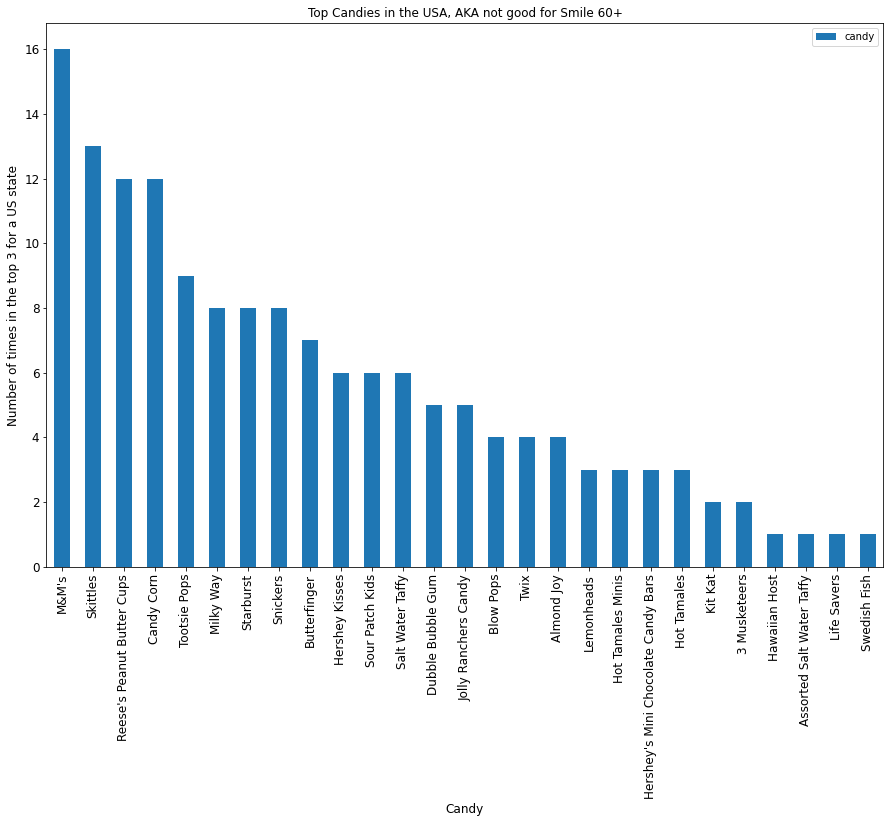

In [157]:
ax = to[['candy']].plot(kind='bar', title ="Top Candies in the USA, AKA not good for Smile 60+", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Candy", fontsize=12)
ax.set_ylabel("Number of times in the top 3 for a US state", fontsize=12)
plt.show()

In [158]:
#Which candies only appear once in the dataset? Which states have them in their top 3?

to.tail(4)

#these did 

,candy
Hawaiian Host,1
Assorted Salt Water Taffy,1
Life Savers,1
Swedish Fish,1


In [ ]:
#OPTIONAL BONUS 2: plot a simple choropleth of candy consumption per capita for states.



<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   NAME               51 non-null     object  
 1   POPESTIMATE2017    51 non-null     int64   
 2   name               51 non-null     object  
 3   3rd_place          51 non-null     object  
 4   2nd_place_pounds   51 non-null     int64   
 5   state              51 non-null     object  
 6   2nd_place          51 non-null     object  
 7   3rd_place_pounds   51 non-null     int64   
 8   top_candy          51 non-null     object  
 9   top_candy_pounds   51 non-null     int64   
 10  geometry           51 non-null     geometry
 11  total_weight       51 non-null     int64   
 12  per_capita         51 non-null     float64 
 13  per_capita_top     51 non-null     float64 
 14  per_capita_second  51 non-null     float64 
 15  per_capita_third   51 non-null     float64 
dtypes: float64

In [163]:
can_pop = gpd.GeoDataFrame(can_pop)

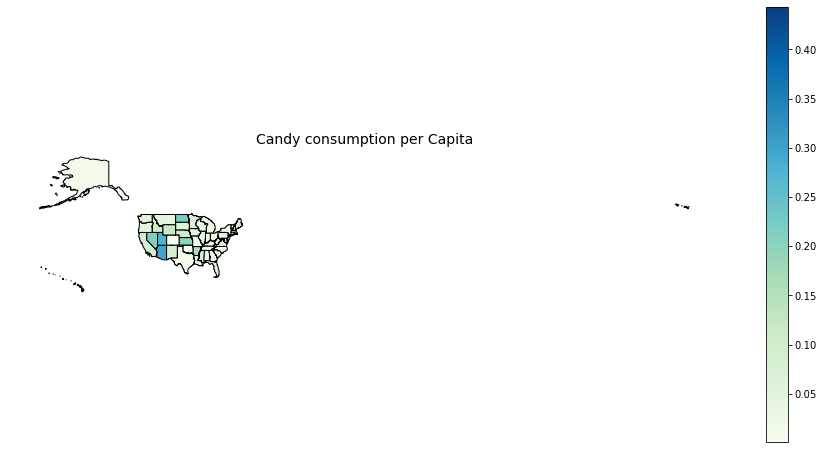

In [167]:
fig, ax = plt.subplots(figsize=(16,8))
can_pop.plot(column = 'per_capita',
             cmap = 'GnBu', 
              edgecolor = 'black', 
              legend = True,
              ax = ax)
plt.title('Candy consumption per Capita', fontsize = 14)
ax.axis('off');